<a href="https://colab.research.google.com/github/Alixandrini/ENGJ22/blob/main/Aula%2010/Exerc%C3%ADcos_aula_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exercícos Propóstos
### Exercício 01: Elipese dos erros 
As coordenadas de dosi vértices $\ P_1$ e $\ P_2 $ foram ajustadas resultando na seguinte MVC(decimetros):
$$
\begin{bmatrix}
 \sigma^2_{x1} &  \sigma_{x1y1} &  \sigma_{x1x2}  &  \sigma_{x1y2} \\
               &  \sigma^2_{y1} &  \sigma_{y1x2}  &  \sigma_{y1y2} \\ 
               &                &  \sigma^2_{x2}  & \sigma_{x2y2}  \\ 
               &                &                 &  \sigma^2_{y2} 
\end{bmatrix} = \begin{bmatrix}
 4,10 &  -0,17 &  4,00  &  -2,20 \\
      &  4,20  &  2,10  &  3,40 \\ 
      &        &  5,60  & 1,20  \\ 
      &        &        &  4,80 \end{bmatrix} 
$$
Aqui os elementos abaixo da diagonal principal dforamo omitidos por se tratar de uma matriz simétrica. Sabendo que a distantcia $\overline{P_1P_2}\cong $ 5 km
e o aximute da direção $P_1P_2 \cong$ 80$^{\circ}$, Calcular e desennhar:

1.   A elipse dos erros de $P_1$;
2.   A elipse dos erros de $P_2$;
3.   A elipse relativa.







#### Resolução
Vamos relembrar algumas formulas para o calculo das elipses dos erros:
\begin{equation} M=\sqrt{4\sigma_{xy}^2+(\sigma_x^2-\sigma_y^2)^2} \\ 
 t=0,5arctang(\frac{2\sigma_{xy}}{(\sigma_x^2-\sigma_y^2)}) \\  
 \sigma_{max}^2=0,5(\sigma_x^2-\sigma_y^2)+0,5M \\ 
 \sigma_{min}^2=0,5(\sigma_x^2-\sigma_y^2)-0,5M \end{equation}

In [ ]:
import numpy as np
MVC=np.matrix([[4.10,-0.17,4.00,-2.20],
              [-0.17,4.20,2.10,3.40],
              [4.00,2.10,5.60,1.20],
              [-2.20,3.40,1.20,4.80]])
M1=abs((4*MVC[0,1]**2+(MVC[0,0]-MVC[1,1])**2)**0.5)
t1=0.5*np.arctan(2*MVC[0,1]/(MVC[0,0]-MVC[1,1]))
smax1=0.5*(MVC[0,0]+MVC[1,1])+0.5*M1
smin1=0.5*(MVC[0,0]+MVC[1,1])-0.5*M1

print(np.sin(2*t1),np.cos(2*t1))

# para trasformar em graus sexagesimais
t1=t1*180/np.pi
print(t1)
M2=abs((4*MVC[2,3]**2+(MVC[2,2]-MVC[3,3])**2)**0.5)
t2=0.5*np.arctan(2*MVC[2,3]/(MVC[2,2]-MVC[3,3]))
smax2=0.5*(MVC[2,2]+MVC[3,3])+0.5*M2
smin2=0.5*(MVC[2,2]+MVC[3,3])-0.5*M2
print(np.sin(2*t2),np.cos(2*t2))
t2=t2*180/np.pi
print(t2)

0.9593655015712701 0.2821663239915516
36.80522983298257
0.9486832980505138 0.31622776601683794
35.782525588538995


Para a elipse Relativa:
\begin{equation} 
\Sigma_{\Delta} =\begin{bmatrix}
\sigma_{\Delta x}^2  & \sigma_{\Delta x \Delta y}  \\ 
  \sigma_{\Delta x \Delta y} & \sigma_{\Delta y}^2 
\end{bmatrix} \\
\begin{bmatrix}
 \sigma_{x1}^2+\sigma_{x2}^2-2\sigma_{x1x2}& \sigma_{x1y1}-\sigma_{x2y1}-\sigma_{x1y2}+\sigma_{x2y2}\\ 
 \sigma_{x1y1}-\sigma_{x2y1}-\sigma_{x1y2}+\sigma_{x2y2}& \sigma_{y1}^2+\sigma_{y2}^2-2\sigma_{y1y2}
\end{bmatrix}
 \end{equation}

In [ ]:
sdeltax=MVC[0,0]+MVC[2,2]-2*MVC[0,2]
sdeltay=MVC[1,1]+MVC[3,3]-2*MVC[1,3]
sdeltaxy=MVC[0,1]-MVC[2,1]-MVC[0,3]+MVC[2,3]
M3=abs((4*sdeltaxy**2+(sdeltax-sdeltay)**2)**0.5)
t3=0.5*np.arctan(2*sdeltaxy/(sdeltax-sdeltay))
smax3=0.5*(sdeltax+sdeltay)+0.5*M3
smin3=0.5*(sdeltax+sdeltay)-0.5*M3
print(np.sin(2*t3),np.cos(2*t3))
t3=t3*180/np.pi+180
print(t3)

-0.9763899401446986 0.21601547348334077
141.23755485610448


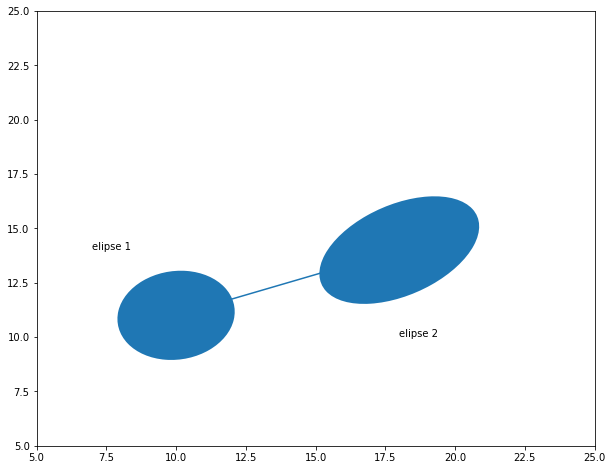

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
x=[10,18]
y=[11,14]

ells = Ellipse((10,11),
                width=smax1, height=smin1,
                angle=t1)
ells1 = Ellipse((18,14),
                width=smax2, height=smin2,
                angle=t2)
fig, ax = plt.subplots()

ax.add_artist(ells)
ax.add_artist(ells1)
ax.plot(x, y)

ax.set_xlim(5, 25)
ax.set_ylim(5, 25)
plt.text(18, 10, "elipse 2", fontsize=10)
plt.text(7, 14, "elipse 1", fontsize=10)
plt.gcf().set_size_inches(10, 8)
plt.show()


###Exercício 02: Ajustamento de uma triangulação
Ajustar o valor das coordeandas de uma estação de posição desconhecida U. Foram observados os ângulos horizontais a partir de três estações conhecidas R(300,000;1500,000), S(800,000;700,000) e T (1000,000;100,000)conforme a figura a seguir. Os ângulos oservador são $\alpha_1$=52$^{\circ}$17'13" , $\alpha_2$=100$^{\circ}$12'04" , $\alpha_3$=93$^{\circ}$22'00" e $\alpha_4$=65$^{\circ}$43'42". Usar desvio padrão de 10" para os ângulos observados.

<img src="https://raw.githubusercontent.com/Alixandrini/ENGJ22/main/Aula%209/trilateracao.png">

#### Resolução
O modelo matemático funcional a ser adotado é:
\begin{equation}
\alpha_1=arctan\left ( \frac{y_R-y_S}{x_S-x_R} \right )-arctan\left ( \frac{y_R-y_U}{x_U-x_R} \right ) \\
\alpha_2=arctan\left ( \frac{y_U-y_S}{x_U-x_R} \right )+arctan\left ( \frac{y_S-y_R}{x_R-x_S} \right )  \\
\alpha_3=arctan\left ( \frac{y_U-y_S}{x_U-x_S} \right )+arctan\left ( \frac{y_S-y_T}{x_T-x_S} \right )  \\
\alpha_4=arctan\left ( \frac{y_T-y_S}{x_S-x_T} \right )+arctan\left ( \frac{y_U-y_T}{x_U-x_T} \right )
\end{equation}

NOTA: Para criar a matriz A a derivação utilizará a regra da cadeia
\begin{equation}
f(g(x))'=f'(g(x))g'(x) \\
\end{equation}
e as seguintes derivadas
\begin{equation}
y=\frac{1}{x} \therefore y'=-\frac{1}{x^2} \\
y=arctang(x) \therefore y'=\frac{1}{x^2+1}
\end{equation}

###Exercicio 03: Ajustamento de Trilateração
Três pontos com as coordenadas conhecidas A(300;1500)m, B(800,700)m e C(1000,100)m foram observados a partir de um ponto U, obtendo distância UA=2009,985m, UB=1615,550m e UC=1769,185m. Determinar as coordenadas ajustadas do ponto U sabendo que as distancias foram obtidas com a precição de 5mm+2ppm.
